In [1]:
!pip install torchsummary

In [2]:
!pip install opencv-python



In [3]:
!pip install Pillow


In [4]:
import gc, os, cv2, PIL, torch
import torchvision as tv
import torch.nn as nn
import torchsummary as ts
import numpy as np
import pandas as pd
import torch.nn as nn
import plotly.express as px
from numpy import random
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import os
import PIL.Image
import seaborn as sns
import PIL
import torchvision.transforms as tv
from PIL import Image
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

data_path = '/content/drive/MyDrive/ANN/myData'



# Listing sub directories
sub_directories = os.listdir(data_path)

# Correct path to the CSV file after mounting Google Drive
labels = pd.read_csv('../content/drive/MyDrive/ANN/labels.csv')




In [7]:
import os

In [8]:
# Finding number of classes in the data
print("Number of Classes: ",len(sub_directories))

Number of Classes:  43


In [9]:
# Finding number of images under each class
no_of_images = []
for directory in sub_directories:
    no_of_images.append(len(os.listdir(os.path.join(data_path, directory))))

labels["n_samples"] = no_of_images
labels.sort_values(["n_samples"], inplace=True)

# Displaying DataFrame containing class name, directory name and number of samples
display(labels)

,ClassId,Name,n_samples
15,15,No vechiles,390
23,23,Slippery road,390
2,2,Speed limit (50km/h),450
1,1,Speed limit (30km/h),450
18,18,General caution,450
25,25,Road work,450
34,34,Turn left ahead,451
20,20,Dangerous curve to the right,510
28,28,Children crossing,510
9,9,No passing,570


In [10]:


# Initialize lists to store images and labels
x, y = [], []

# Define the data directory
data_dir = '../content/drive/MyDrive/ANN/myData'

# Iterate through each folder in the data directory
for folder in range(43):
    folder_path = os.path.join(data_dir, str(folder))  # Construct the folder path
    # Iterate through each image file in the folder
    for i, img in enumerate(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, img)  # Construct the image path
        # Load the image and convert to tensor
        img_tensor = tv.ToTensor()(PIL.Image.open(img_path))
        # Convert tensor to numpy array and append to x
        x.append(img_tensor.numpy())
        # Append the label (folder number) to y
        y.append(folder)
    print(f'Folder of label {folder} images loaded. Number of samples: {i + 1}')

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)


Folder of label 0 images loaded. Number of samples: 451
Folder of label 1 images loaded. Number of samples: 4920
Folder of label 2 images loaded. Number of samples: 2610
Folder of label 3 images loaded. Number of samples: 2670
Folder of label 4 images loaded. Number of samples: 3750
Folder of label 5 images loaded. Number of samples: 3510
Folder of label 6 images loaded. Number of samples: 780
Folder of label 7 images loaded. Number of samples: 2730
Folder of label 8 images loaded. Number of samples: 2670
Folder of label 9 images loaded. Number of samples: 2790
Folder of label 10 images loaded. Number of samples: 3810
Folder of label 11 images loaded. Number of samples: 2490
Folder of label 12 images loaded. Number of samples: 3990
Folder of label 13 images loaded. Number of samples: 4080
Folder of label 14 images loaded. Number of samples: 1470
Folder of label 15 images loaded. Number of samples: 1170
Folder of label 16 images loaded. Number of samples: 780
Folder of label 17 images l

In [11]:
# np.unique returns all the labels as one array and
#number of samples available respect to that label as another array.
np.unique(y,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 array([ 451, 4920, 2610, 2670, 3750, 3510,  780, 2730, 2670, 2790, 3810,
        2490, 3990, 4080, 1470, 1170,  780, 2100, 2280,  390,  660,  600,
         720,  960,  510, 2850, 1140,  450, 1020,  510,  840, 1470,  450,
        1288,  787, 2280,  720,  390, 3930,  570,  660,  450,  450]))

<ipython-input-12-4dd7972ef49c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels["Name"], y=labels["n_samples"], palette="deep")


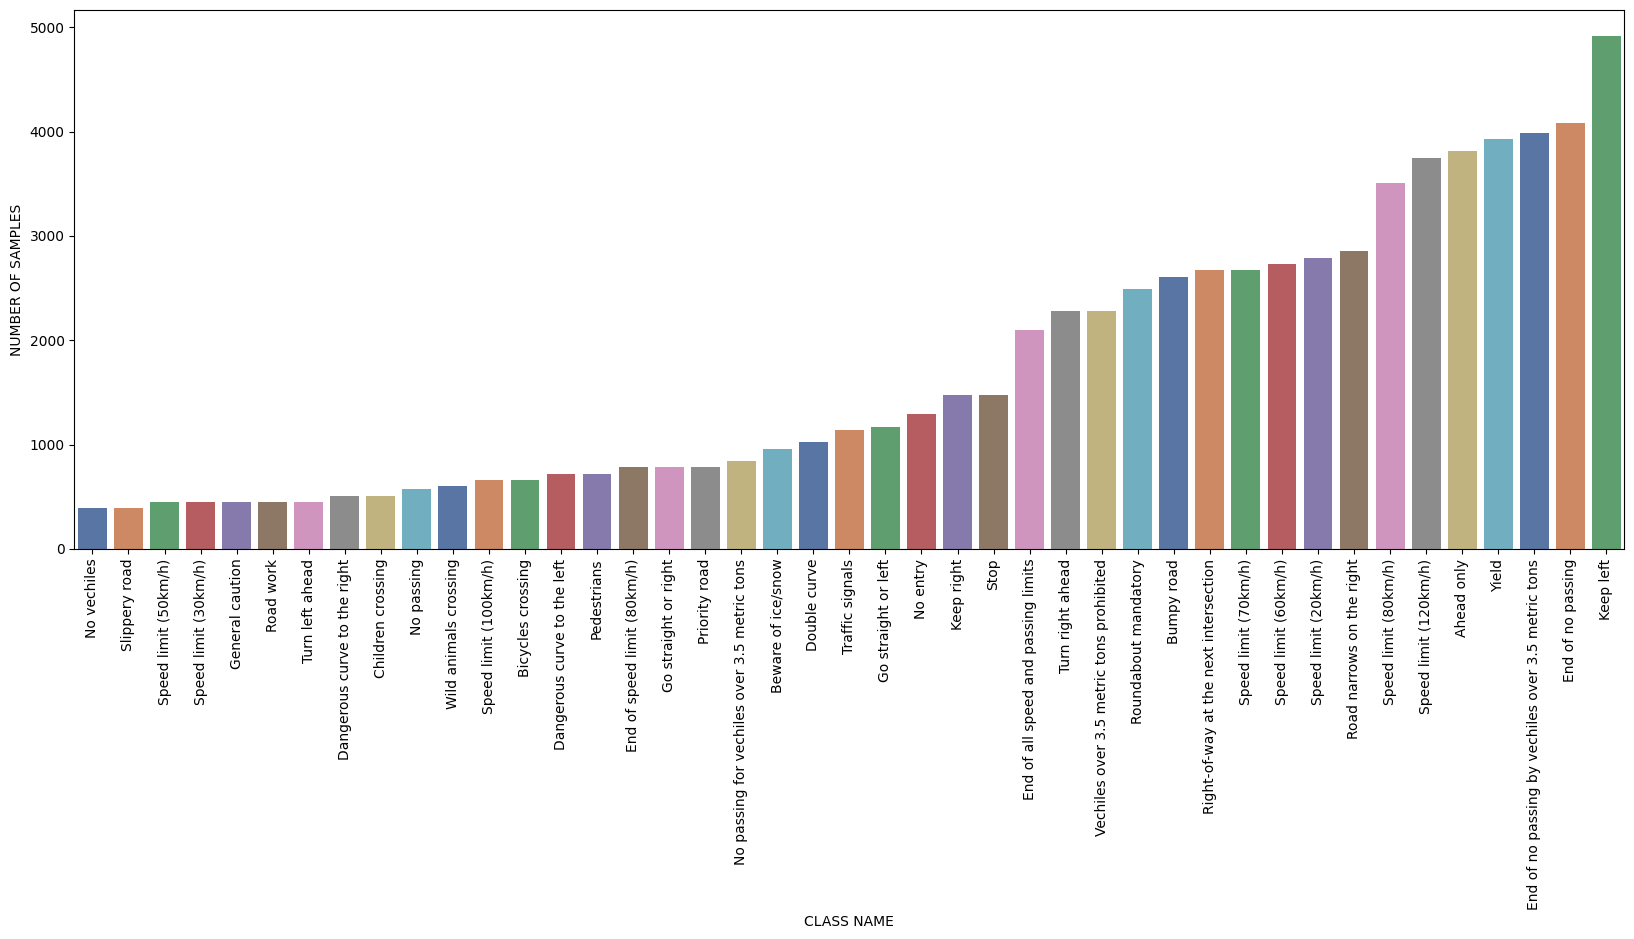

In [12]:

# Visualising number of samples under each class
f, ax = plt.subplots(figsize=(20, 7))
sns.barplot(x=labels["Name"], y=labels["n_samples"], palette="deep")
plt.xlabel("CLASS NAME")
plt.ylabel("NUMBER OF SAMPLES")
plt.xticks(rotation=90)
plt.show()


In [13]:
# checking resolution of the images

res = cv2.imread(os.path.join(data_path, sub_directories[0], os.listdir(os.path.join(data_path, sub_directories[0]))[0])).shape
print("Height: ", res[0])
print("Width: ", res[1])
print("Number of Channels: ", res[2])
print("Resolution: {}x{}".format(res[0], res[1]))

Height:  32
Width:  32
Number of Channels:  3
Resolution: 32x32


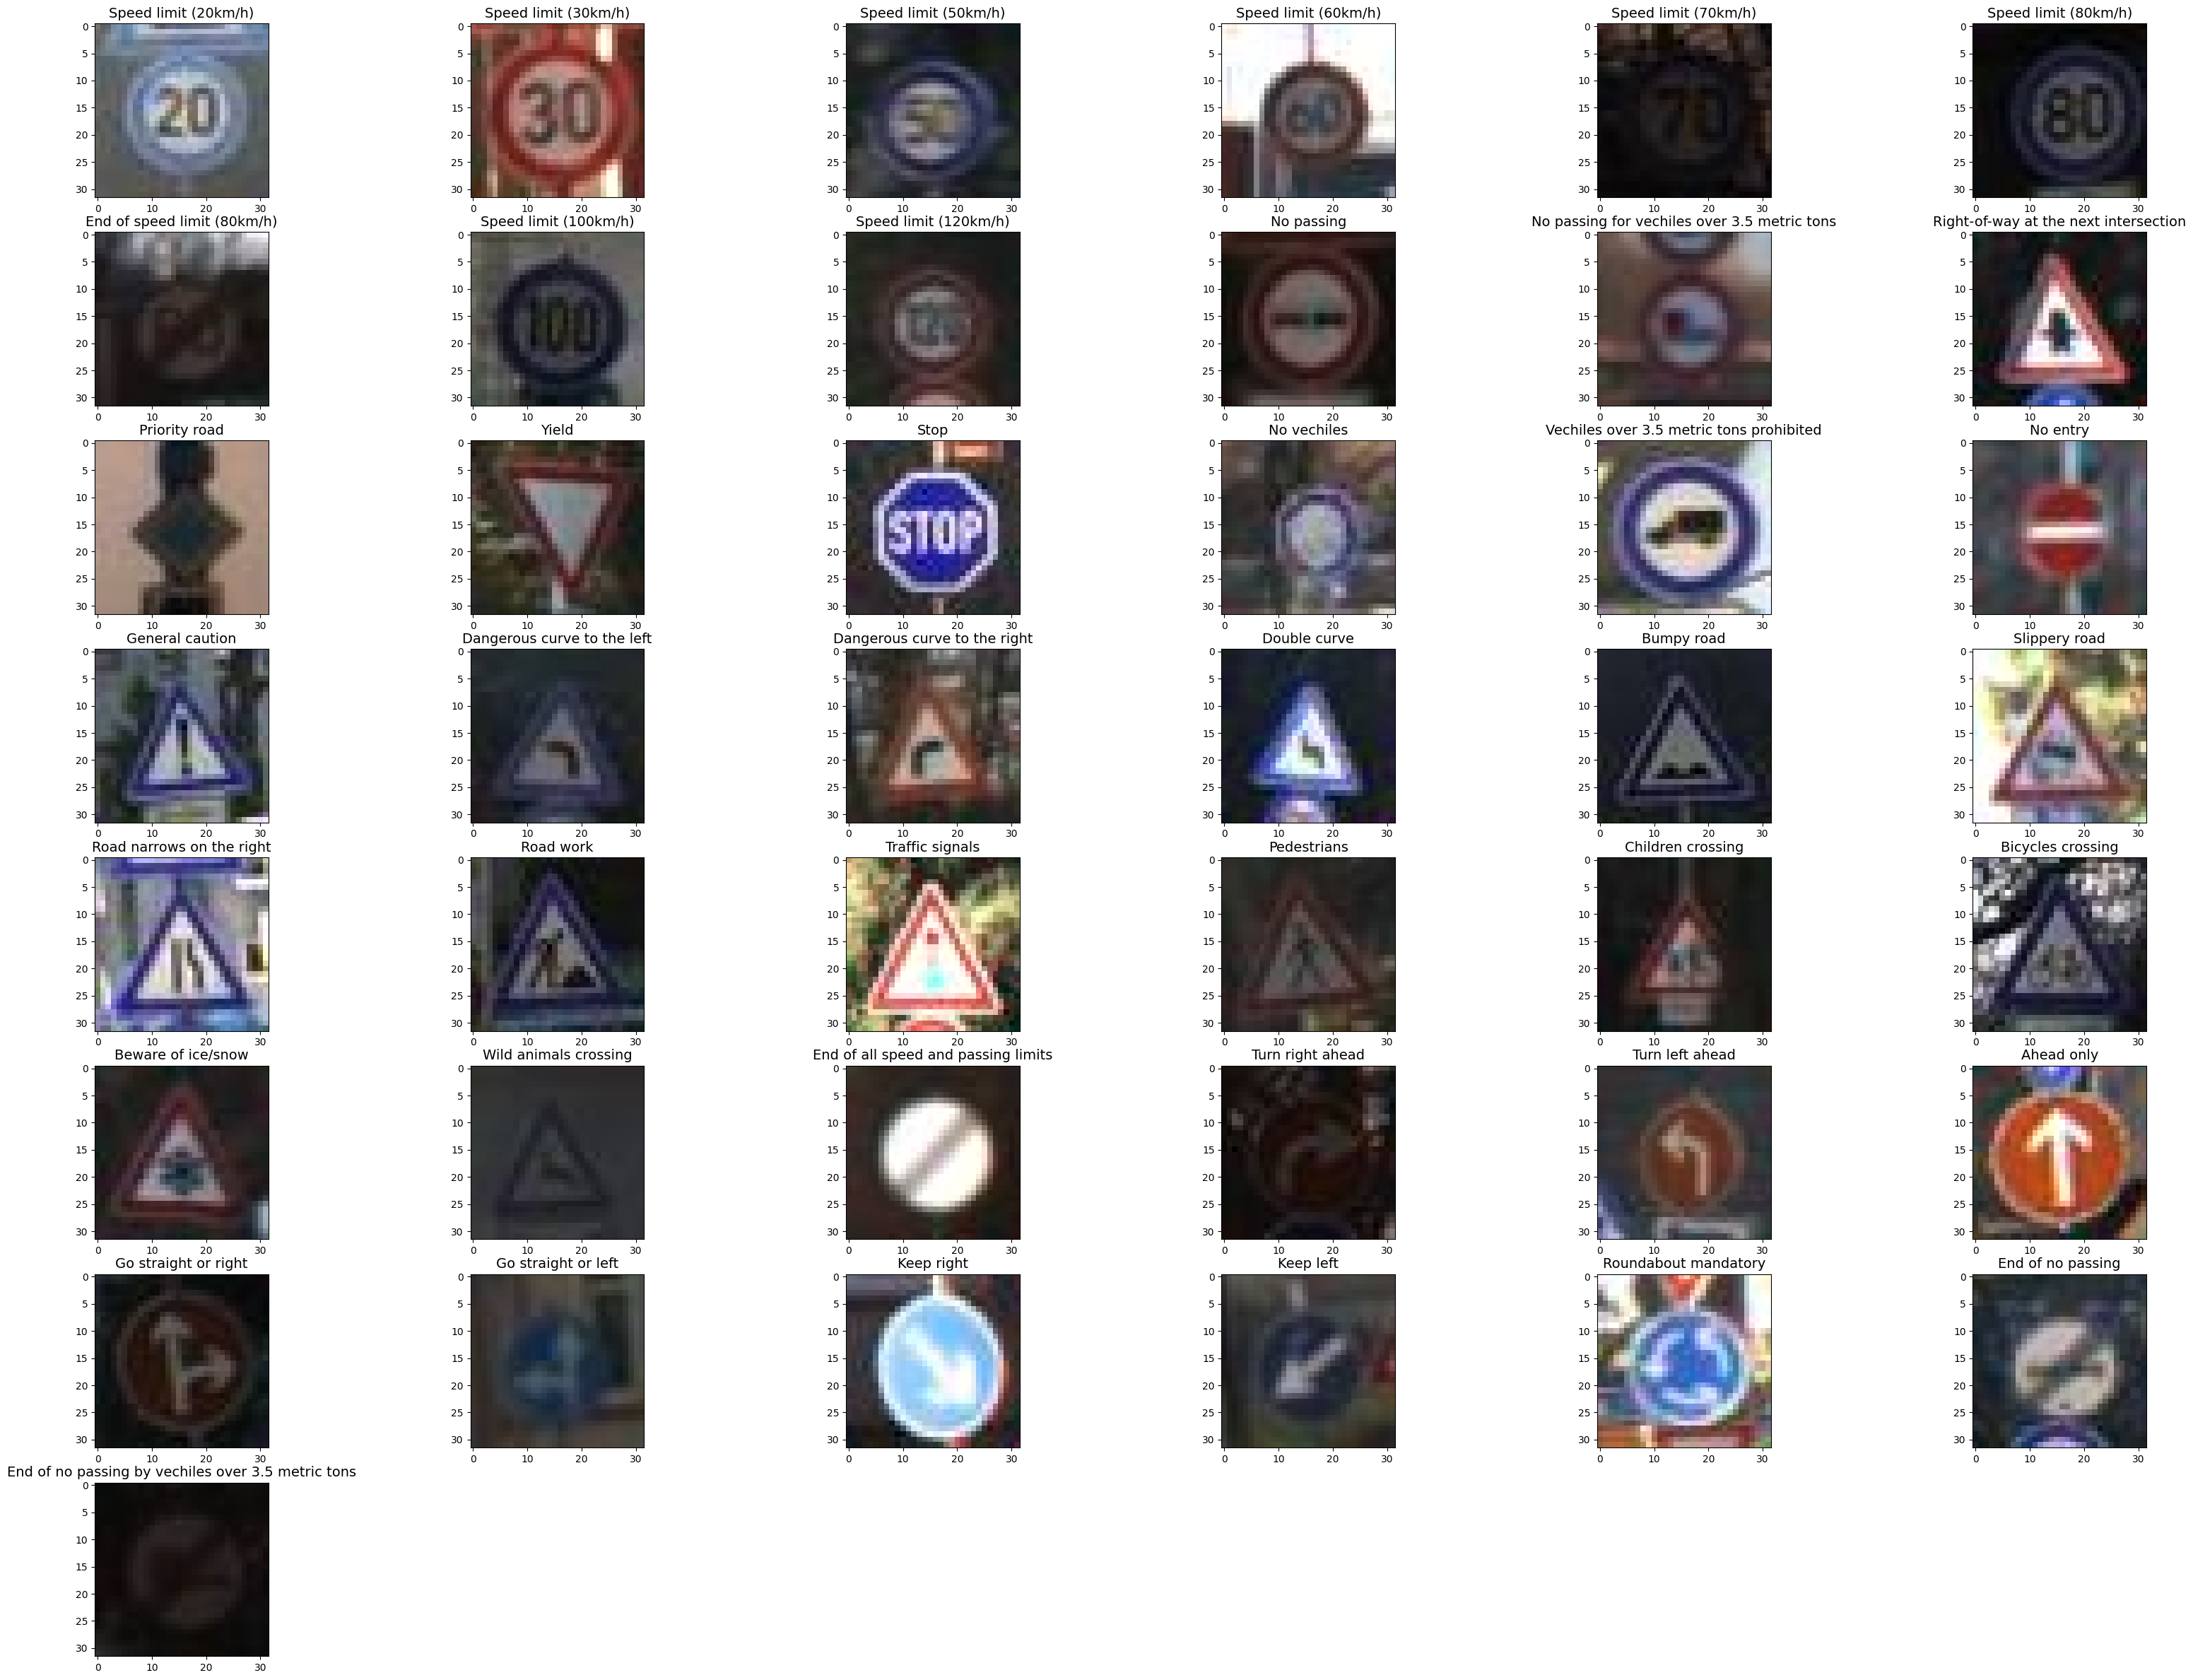

In [14]:
# displaying some images randomly from each class
fig = plt.figure(figsize=(40, 30))
rows = 8
cols = 6
for directory in sub_directories:
    current_dir_files = os.listdir(os.path.join(data_path, directory))
    img = cv2.imread(os.path.join(data_path, directory, current_dir_files[random.randint(len(current_dir_files))]))
    fig.add_subplot(rows, cols, int(directory)+1)
    plt.imshow(img)
    plt.title(labels["Name"][int(directory)], fontsize=14)

In [15]:
x = x.reshape(x.shape[0],3*32*32) # flatten x as RandomOverSampler only accepts 2-D matrix
# RandomOverSampler method duplicates samples in the minority class to balance dataset
x,y = RandomOverSampler().fit_resample(x,y)
x = x.reshape(x.shape[0],3,32,32) # reshaped again as it was
x.shape, y.shape

((211560, 3, 32, 32), (211560,))

In [16]:
np.unique(y,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 array([4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920,
        4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920,
        4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920,
        4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920]))

In [17]:
# Stratified split on the dataset
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,stratify=y)
del x,y
gc.collect() # delete x,y and free the memory
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape # splited data shapes

((169248, 3, 32, 32), (42312, 3, 32, 32), (169248,), (42312,))

In [18]:
xtrain = torch.from_numpy(xtrain)
ytrain = torch.from_numpy(ytrain)
xtest = torch.from_numpy(xtest)
ytest = torch.from_numpy(ytest)

In [19]:
pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86

In [20]:

# Define the model using nn.Sequential
model = nn.Sequential(
    # 1st convolutional network layer
    nn.Conv2d(3, 16, (2, 2), (1, 1), 'same'),  # Convolution
    nn.BatchNorm2d(16),                       # Normalization
    nn.ReLU(True),                            # Activation
    nn.MaxPool2d((2, 2)),                     # Pooling

    # 2nd convolutional network layer
    nn.Conv2d(16, 32, (2, 2), (1, 1), 'same'),  # Convolution
    nn.BatchNorm2d(32),                         # Normalization
    nn.ReLU(True),                              # Activation
    nn.MaxPool2d((2, 2)),                       # Pooling

    # 3rd convolutional network layer
    nn.Conv2d(32, 64, (2, 2), (1, 1), 'same'),  # Convolution
    nn.BatchNorm2d(64),                         # Normalization
    nn.ReLU(True),                              # Activation
    nn.MaxPool2d((2, 2)),                       # Pooling

    # Flatten data
    nn.Flatten(),                               # Flatten

    # Feed forward layers
    nn.Linear(1024, 256),                       # Linear
    nn.ReLU(True),                              # Activation
    nn.Linear(256, 43)                          # Linear
)

# Check if CUDA is available and send the model to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device, non_blocking=True)

# Print the model summary
ts.summary(model, (3, 32, 32))


# Assume xtest and ytest are your test data and labels
# Create sample data for xtest and ytest for demonstration purposes
# Replace this with your actual test data
xtest = torch.randn(100, 3, 32, 32)  # 100 sample images, 3 channels, 32x32 size
ytest = torch.randint(0, 43, (100,))  # 100 sample labels from 0 to 42

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1031.)
  return F.conv2d(input, weight, bias, self.stride,


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             208
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
         MaxPool2d-4           [-1, 16, 16, 16]               0
            Conv2d-5           [-1, 32, 16, 16]           2,080
       BatchNorm2d-6           [-1, 32, 16, 16]              64
              ReLU-7           [-1, 32, 16, 16]               0
         MaxPool2d-8             [-1, 32, 8, 8]               0
            Conv2d-9             [-1, 64, 8, 8]           8,256
      BatchNorm2d-10             [-1, 64, 8, 8]             128
             ReLU-11             [-1, 64, 8, 8]               0
        MaxPool2d-12             [-1, 64, 4, 4]               0
          Flatten-13                 [-1, 1024]               0
           Linear-14                  [

In [21]:
# Define the evaluate function
def evaluate(model, data, target):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # sending data and target to the appropriate device
    data = data.to(device, non_blocking=True)
    target = target.to(device, non_blocking=True)

    length = len(target)
    model.eval()  # set the model to evaluation mode

    with torch.no_grad():  # no need to compute gradients for evaluation
        yhat = model(data)  # predict on data
        ypred = yhat.argmax(axis=1)  # calculate the prediction labels from yhat
        loss = float(nn.functional.cross_entropy(yhat, target))  # calculate the loss
        acc = float((ypred == target).sum() / length)  # calculate accuracy

    print('Loss :', round(loss, 4), '- Accuracy :', round(acc, 4))  # print loss and accuracy

    # free memory
    del data, target, yhat, ypred
    torch.cuda.empty_cache()

In [ ]:

# Evaluate the model
print('\nInitial Loss and Accuracy on Test Dataset:')
evaluate(model, xtest.float(), ytest)

In [ ]:
import torch

def evaluate(model, data, target):
    # Check if CUDA is available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Sending data and target to the appropriate device (GPU or CPU)
    data = data.to(device, non_blocking=True)
    target = target.to(device, non_blocking=True)

    length = len(target)
    yhat = model(data)  # Predict on data
    ypred = yhat.argmax(axis=1)  # Calculate the prediction labels from yhat
    loss = float(nn.functional.cross_entropy(yhat, target))  # Calculate the loss
    acc = float((ypred == target).sum() / length)  # Calculate accuracy

    print('Loss:', round(loss, 4), '- Accuracy:', round(acc, 4))  # Print loss and accuracy

    # Clear the used variables and free CUDA memory if available
    del data, target, yhat, ypred
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

# Assuming xtest and ytest are defined and contain your test data and labels
print('\nInitial Loss and Accuracy on Test Dataset:')
evaluate(model, xtest.float(), ytest)

In [24]:
import gc
import torch

def train_model(model, optimizer=torch.optim.Adam, epochs=5, batch_size=200, steps_per_epochs=200, l2_reg=0, max_lr=0.01, grad_clip=0.5):
    hist = [[],[],[],[]]  # hist will store train and test data losses and accuracy of every epoch

    # Check if GPU is available and set device accordingly
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    train_ds = [(x, y) for x, y in zip(xtrain, ytrain)]  # Prepare training dataset for Data Loader
    training_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size)  # Data Loader used to train model
    train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size * steps_per_epochs)  # Data Loader for epoch end evaluation on train data
    del train_ds
    gc.collect()  # Delete the used variable and free up memory

    # Initialize the Optimizer to update weights and bias of model parameters
    optimizer = optimizer(model.parameters(), weight_decay=l2_reg)

    # Initialize the Scheduler to update learning rate as per one cycle policy
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=int(steps_per_epochs * 1.01))

    # Move model to the appropriate device
    model.to(device)

    # Training Started
    for i in range(epochs):
        print('\nEpoch', i+1, ': [', end="")

        # Load Batches of training data loader
        for j, (xb, yb) in enumerate(training_dl):
            # Move the training batch data to the selected device
            xb = xb.to(device, non_blocking=True)
            yb = yb.to(device, non_blocking=True)

            # Calculate Losses and gradients
            yhat = model(xb.float())
            loss = nn.functional.cross_entropy(yhat, yb)
            loss.backward()

            # Clip the outlier-like gradients
            nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            # Update Weights and bias
            optimizer.step()
            optimizer.zero_grad()

            # Update Learning Rate
            sched.step()

            del xb, yb, yhat
            torch.cuda.empty_cache()  # Delete the used data and free up space

            # Print the training epochs progress
            if j % int(steps_per_epochs / 20) == 0:
                print('.', end='')

            # Break the loop when all steps of an epoch are completed.
            if steps_per_epochs == j:
                break

        # Epochs end evaluation
        # Load training data batches from train data loader
        for xtrainb, ytrainb in train_dl:
            break

        # Move train data to the selected device
        xtrain_cuda = xtrainb.to(device, non_blocking=True)
        ytrain_cuda = ytrainb.to(device, non_blocking=True)
        del xtrainb, ytrainb
        gc.collect()  # Delete used variables and free up space

        # Calculate train loss and accuracy
        yhat = model(xtrain_cuda.float())
        ypred = yhat.argmax(axis=1)
        train_loss = float(nn.functional.cross_entropy(yhat, ytrain_cuda))
        train_acc = float((ypred == ytrain_cuda).sum() / len(ytrain_cuda))

        del xtrain_cuda, ytrain_cuda, yhat, ypred
        torch.cuda.empty_cache()  # Delete used variables and free up space

        # Move test data to the selected device
        xtest_cuda = xtest.to(device, non_blocking=True)
        ytest_cuda = ytest.to(device, non_blocking=True)

        # Calculate test loss and accuracy
        yhat = model(xtest_cuda.float())
        ypred = yhat.argmax(axis=1)
        val_loss = float(nn.functional.cross_entropy(yhat, ytest_cuda))
        val_acc = float((ypred == ytest_cuda).sum() / len(ytest_cuda))

        del xtest_cuda, ytest_cuda, yhat, ypred
        torch.cuda.empty_cache()  # Delete used variables and free up space

        # Print the captured train and test loss and accuracy at the end of every epoch
        print('] - Train Loss :', round(train_loss, 4), '- Train Accuracy :', round(train_acc, 4),
              '- Val Loss :', round(val_loss, 4), '- Val Accuracy :', round(val_acc, 4))

        # Store that data into the previously blank initialized hist list
        hist[0].append(train_loss)
        hist[1].append(val_loss)
        hist[2].append(train_acc)
        hist[3].append(val_acc)

    # Initialize all the evaluation history of all epochs to a dict
    history = {'Train Loss': hist[0], 'Val Loss': hist[1], 'Train Accuracy': hist[2], 'Val Accuracy': hist[3]}

    # Return the history as pandas DataFrame
    return pd.DataFrame(history)

In [ ]:
%%time
history = train_model(model, optimizer=torch.optim.Adam, epochs=25, steps_per_epochs=200, l2_reg=0, max_lr=0.015, grad_clip=0.5)


In [ ]:
# used plotly for interactive plotting
fig = px.line(history.iloc[:,:2],title='Loss Per Epochs',labels={'value':'Loss','index':'Epochs'})
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5}).show()
fig = px.line(history.iloc[:,2:],title='Accuracy Per Epochs',labels={'value':'Accuracy','index':'Epochs'})
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5}).show()

In [ ]:
# move to cuda
xtest =  xtest.to(torch.device('cuda'),non_blocking=True)
# generate predictions
ypred = model(xtest.float()).argmax(axis=1)
# again move back xtest , ypred to cpu
xtest = xtest.to(torch.device('cpu'),non_blocking=True)
ypred = ypred.to(torch.device('cpu'),non_blocking=True)
# calculate the classification metrices and print result
print(classification_report(ytest,ypred))

In [28]:
def prediction(img):
    if type(img) == str:
        # PIL load the image as PIL object and ToTensor() convert this to a Tensor
        img = tv.transforms.ToTensor()(PIL.Image.open(img))
    # resize image to 32X32 as model supports this
    img = cv2.resize(img.permute(1,2,0).numpy(),(32,32))
    img = torch.from_numpy(img).permute(2,0,1)
    # unsqueezed img as inside a tensor and move to cuda
    img_tensor = img.unsqueeze(0).to(torch.device('cuda'))
    # Predict the label
    pred = int(model(img_tensor).argmax(axis=1)[0])
    # Find the traffic sign name for label from labels_df
    # that initialize at the begining of the notebook
    pred_str = labels[labels['ClassId'] == pred]['Name'][pred]
    # Show the image using matplotlib
    plt.figure(figsize=(5,5))
    plt.imshow(cv2.resize(img.permute(1,2,0).numpy(),(1000,1000)))
    plt.axis('off')
    # Print traffic sign that recognized
    print('\nRecognized Traffic Sign :',pred_str,'\n')

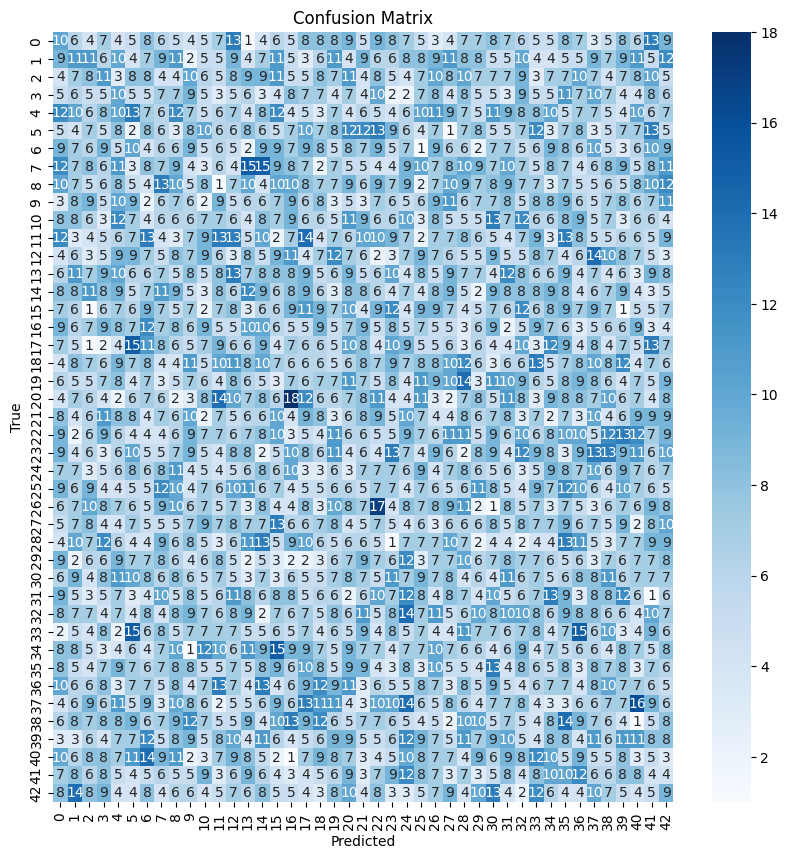

In [38]:


# Example true labels and predicted labels
# These should come from your actual model predictions
# For this example, they are randomly generated to illustrate the process
true_labels = np.random.randint(0, 43, size=12630)  # Replace with actual true labels
predicted_labels = np.random.randint(0, 43, size=12630)  # Replace with actual predicted labels

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=np.arange(43))

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(43), yticklabels=np.arange(43))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



Recognized Traffic Sign : No entry 



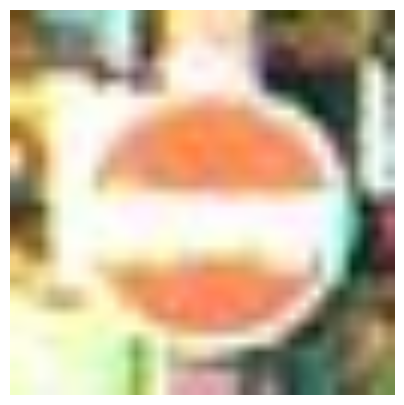

In [29]:
prediction('../content/drive/MyDrive/ANN/myData/17/00000_00004.jpg')


Recognized Traffic Sign : Speed limit (50km/h) 



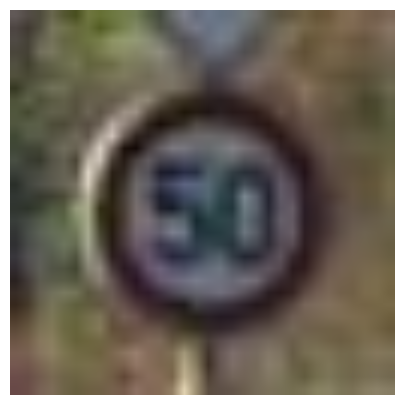

In [30]:
prediction('../content/drive/MyDrive/ANN/myData/2/00000_00017.jpg')


Recognized Traffic Sign : Bicycles crossing 



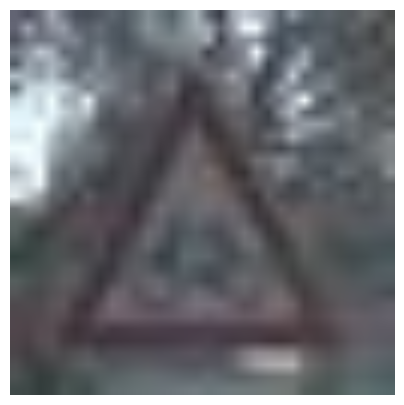

In [31]:
prediction('../content/drive/MyDrive/ANN/myData/29/00000_00029.jpg')


Recognized Traffic Sign : Speed limit (100km/h) 



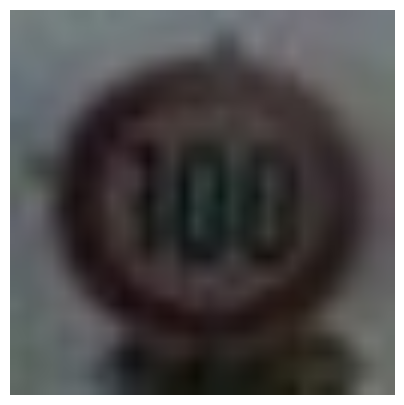

In [32]:
prediction('../content/drive/MyDrive/ANN/myData/7/00000_00025.jpg')


Recognized Traffic Sign : Stop 



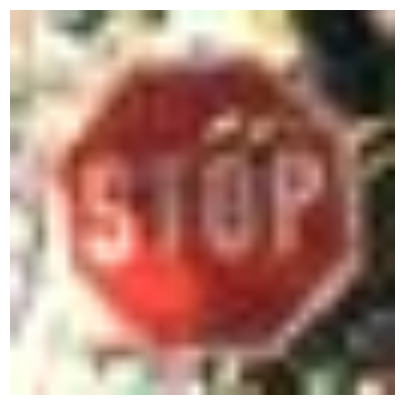

In [33]:
prediction('../content/drive/MyDrive/ANN/myData/14/00000_00019.jpg')

In [34]:
torch.save(model,'traffic_sign_recognition.pt')